# MTRN4110 Phase C

Author: Colin Li


# Program Start
## import libraries

In [1]:
import cv2 # OpenCV library
import numpy as np # Numpy library for scientific computing
import matplotlib.pyplot as plt # Matplotlib library for plotting

MAZE_FILE_NAME = "../Maze.png"
ROBOT_FILE_NAME = "../Robot.png"
IMAGE_LADYBUG_FILE_NAME = "../Ladybug_small.png"
MAP_FILE_NAME = "../MapBuilt.txt"

from lecture vision 1

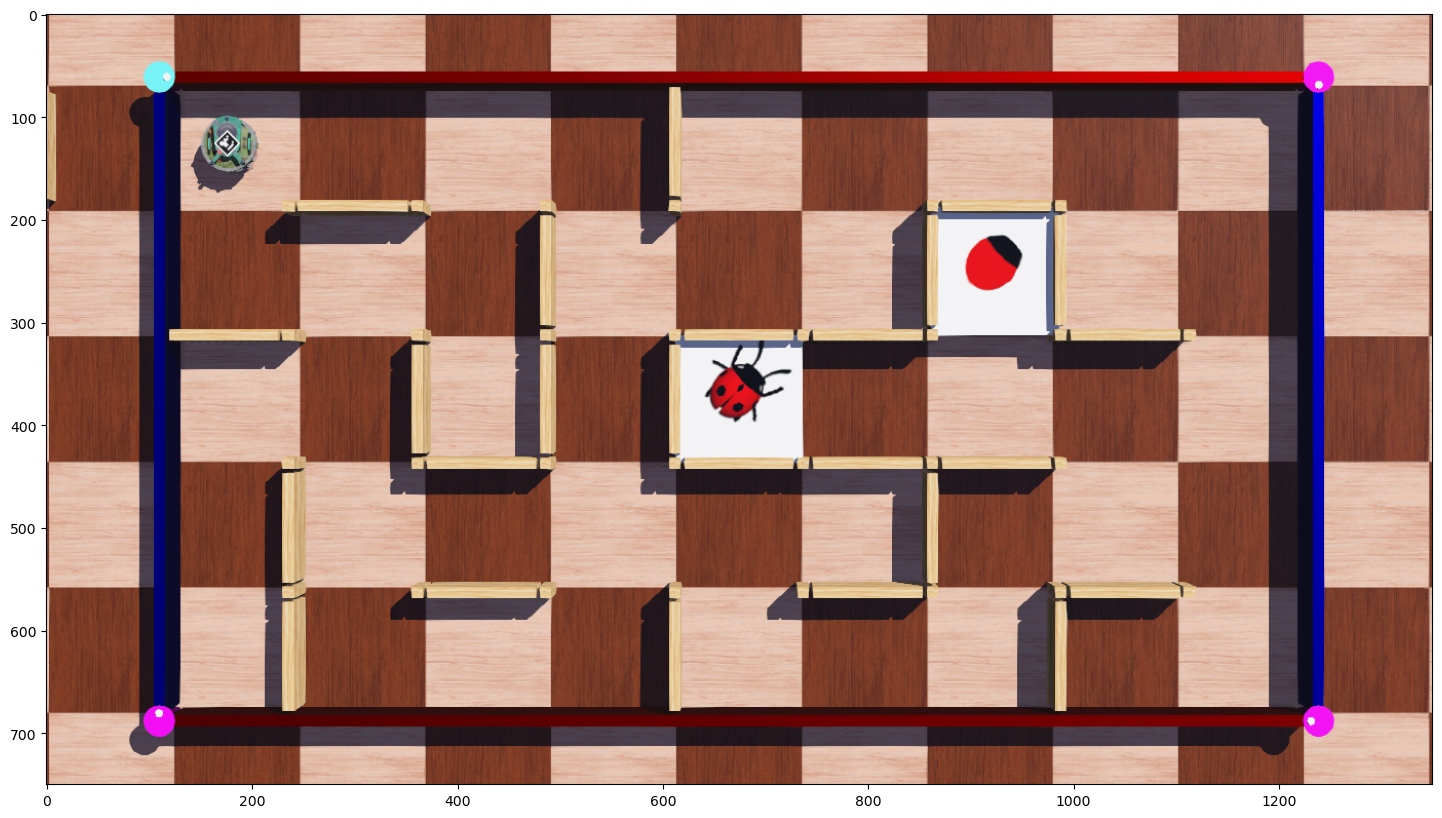

In [2]:
img = cv2.imread(MAZE_FILE_NAME)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # OpenCV reads an image in the BGR order by default, this function can change the order to RGB
plt.figure(figsize = (18, 10))
plt.imshow(img_rgb)
plt.show()
#img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) # OpenCV reads an image in the BGR order by default, this function can change the order to RGB
#plt.figure(figsize = (18, 10))
#plt.imshow(img_hsv)
#plt.show()

In [3]:
#px_rgb = img_rgb[50, 100] # pixel value at row = 50, column = 100
#print(px_rgb)
#px_rgb = img_rgb[695, 100]
#print(px_rgb)

#px_hsv = img_hsv[50, 100] # pixel value at row = 100, column = 100
#print(px_hsv)
#px_hsv = img_hsv[695, 100] # pixel value at row = 400, column = 400
#print(px_hsv)

# Cornerstone Detection
## Colour Threshold HSV Values
### cyan
hmin = 85
smin = 110
vmin = 220
hmax = 95
smax = 140
vmax = 255

### magenta
hmin = 140
smin = 200
vmin = 220
hmax = 160
smax = 245
vmax = 255


In [4]:
# Magenta Thresholding

# Set minimum and maximum HSV values to display
lowerMagenta = np.array([140, 200, 220])
upperMagenta = np.array([160, 245, 255])

# Convert to HSV format and color threshold
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv, lowerMagenta, upperMagenta)
result = cv2.bitwise_and(img, img, mask=mask)
    
# Convert grayscale image to color image for displaying simultaneous
maskMagenta = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)
    
#fig, (ax1, ax2, ax3) = plt.subplots(figsize = (18, 10), ncols = 3)
#ax1.imshow(img), ax1.set_title("Original")
#ax2.imshow(result, cmap='gray'), ax2.set_title("Result")
#ax3.imshow(maskMagenta), ax3.set_title("Mask")
#plt.show()

In [5]:
# Cyan Thresholding

# Set minimum and maximum HSV values to display
lowerCyan = np.array([85, 110, 220])
upperCyan = np.array([95, 140, 255])

# Convert to HSV format and color threshold
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv, lowerCyan, upperCyan)
result = cv2.bitwise_and(img, img, mask=mask)
    
# Convert grayscale image to color image for displaying simultaneous
maskCyan = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)

#fig, (ax1, ax2, ax3) = plt.subplots(figsize = (18, 10), ncols = 3)
#ax1.imshow(img), ax1.set_title("Original")
#ax2.imshow(result, cmap='gray'), ax2.set_title("Result")
#ax3.imshow(maskCyan), ax3.set_title("Mask")
#plt.show()

## Morphological Transformations

In [6]:
#kernel = np.ones((8,8), np.uint8)
kernel2 = np.ones((3,3), np.uint8)
#closeMagenta = cv2.morphologyEx(maskMagenta, cv2.MORPH_CLOSE, kernel)
#openMagenta = cv2.morphologyEx(maskMagenta, cv2.MORPH_OPEN, kernel2)
#dilMagenta = cv2.dilate(openMagenta, kernel2, iterations = 1)
dilMagenta = cv2.dilate(maskMagenta, kernel2, iterations = 3)
eroMagenta = cv2.erode(dilMagenta, kernel2, iterations = 2)

#fig, (ax1, ax2) = plt.subplots(figsize = (18, 10), ncols = 2)
#ax1.imshow(maskMagenta, cmap='gray'), ax1.set_title("Original")
#ax2.imshow(dilMagenta, cmap='gray'), ax2.set_title("Dilation")
#plt.show()

In [7]:
#kernel = np.ones((8,8), np.uint8)
#closeCyan = cv2.morphologyEx(maskCyan, cv2.MORPH_CLOSE, kernel)
openCyan = cv2.morphologyEx(maskCyan, cv2.MORPH_OPEN, kernel2)
dilCyan = cv2.dilate(openCyan, kernel2, iterations = 3)
eroCyan = cv2.erode(dilCyan, kernel2, iterations = 2)

#fig, (ax1, ax2) = plt.subplots(figsize = (18, 10), ncols = 2)
#ax1.imshow(maskCyan, cmap='gray'), ax1.set_title("Original")
#ax2.imshow(dilCyan, cmap='gray'), ax2.set_title("Dilation")
#plt.show()

## Edge detection and Contour detection

In [8]:
#edgesMagenta = cv2.Canny(maskMagenta, threshold1 = 50, threshold2 = 100, apertureSize = 3)
#edgesCyan = cv2.Canny(maskCyan, threshold1 = 50, threshold2 = 100, apertureSize = 3)

edgesMagenta = cv2.Canny(eroMagenta, threshold1 = 50, threshold2 = 100, apertureSize = 3)
edgesCyan = cv2.Canny(eroCyan, threshold1 = 50, threshold2 = 100, apertureSize = 3)

#fig, (ax1, ax2) = plt.subplots(figsize = (18, 10), ncols = 2)
#ax1.imshow(edgesMagenta, cmap='gray'), ax1.set_title("Magenta")
#ax2.imshow(edgesCyan, cmap='gray'), ax2.set_title("Cyan")
#plt.show()

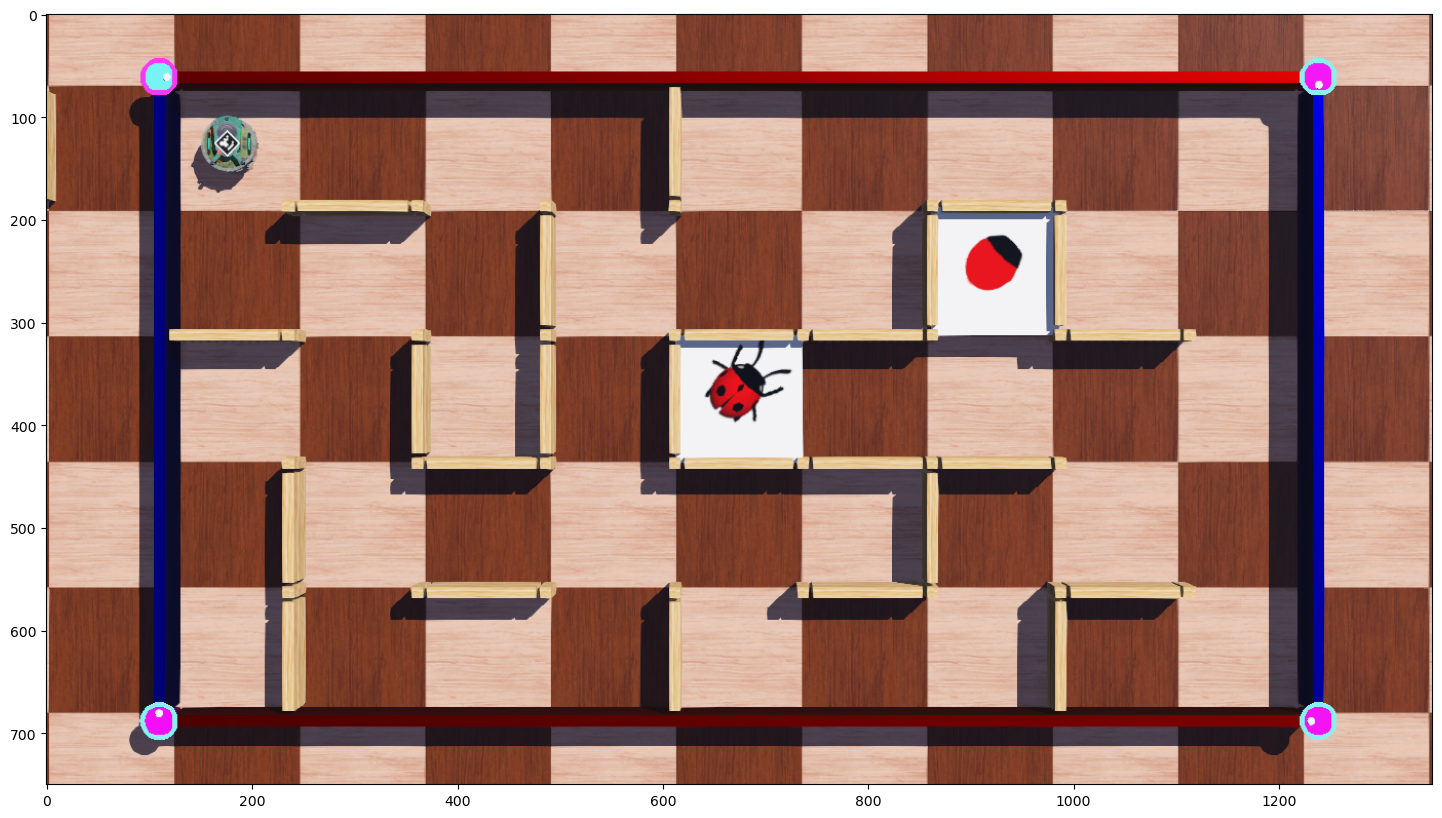

In [9]:
#img = cv2.imread('../maze.png')

img2, contoursMagenta, hierarchy = cv2.findContours(edgesMagenta, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
img2, contoursCyan, hierarchy = cv2.findContours(edgesCyan, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img, contoursMagenta, -1, (239, 238, 139), 3)
cv2.drawContours(img, contoursCyan, -1, (245, 57, 245), 3)

img_rgb_new = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize = (18, 10))
plt.imshow(img_rgb_new)
plt.show()

# Perspective Transform

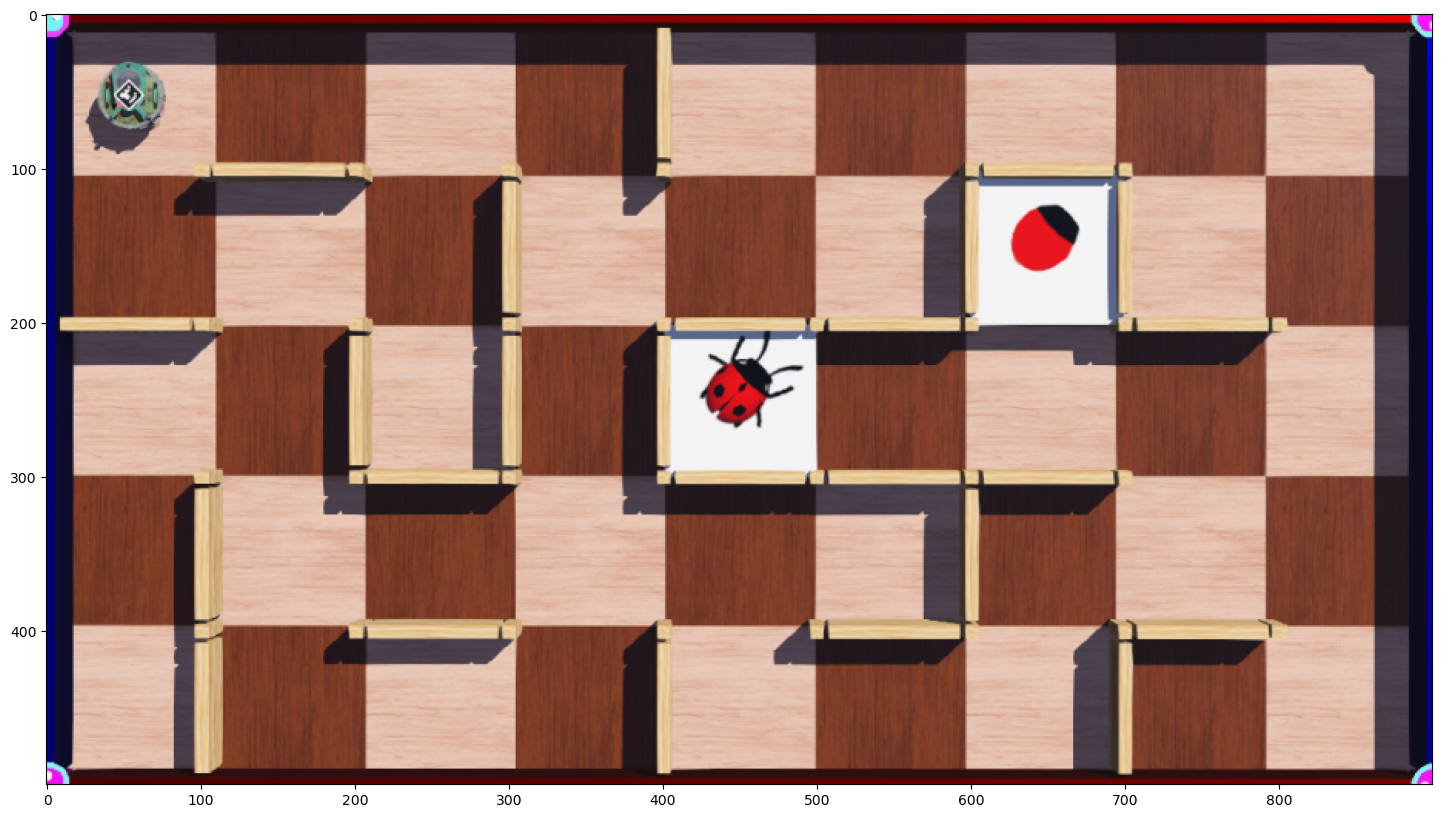

In [10]:
magentaX = []
magentaY = []

for i, cnt in enumerate(contoursMagenta):
    mMagenta = cv2.moments(cnt)
    magentaX.append(int(mMagenta['m10']/mMagenta['m00']))
    magentaY.append(int(mMagenta['m01']/mMagenta['m00']))
    #print(magentaX[i], magentaY[i])
    if magentaX[i] < 337.5 and magentaY[i] < 375:
        regionA = [magentaX[i],magentaY[i]]
    if magentaX[i] < 337.5 and magentaY[i] > 375:
        regionC = [magentaX[i],magentaY[i]]
    if magentaX[i] > 1012.5 and magentaY[i] < 375:
        regionB = [magentaX[i],magentaY[i]]
    if magentaX[i] > 1012.5 and magentaY[i] > 375:
        regionD = [magentaX[i],magentaY[i]]

for i, cnt in enumerate(contoursCyan):
    mCyan = cv2.moments(cnt)
    cyanX = int(mCyan['m10']/mCyan['m00'])
    cyanY = int(mCyan['m01']/mCyan['m00'])
    #print(cyanX, cyanY)

# If cyan cornerstone is in Region A
if cyanX < 338:
    pts1 = np.float32([[cyanX,cyanY], regionB, regionC, regionD])
    pts2 = np.float32([[0,0], [900,0], [0,500], [900,500]])
# Else cyan cornerstone is in Region D
else:
    pts1 = np.float32([[cyanX,cyanY], regionC, regionB, regionA])
    pts2 = np.float32([[0,0], [900,0], [0,500], [900,500]])

H = cv2.getPerspectiveTransform(pts1,pts2)

transformedImg = cv2.warpPerspective(img_rgb_new, H, (900,500))

plt.figure(figsize = (18, 10))
plt.imshow(transformedImg)
plt.show()

# Wall detection
## Colour thresholding
hmin = 15
smin = 0
vmin = 220
hmax = 20
smax = 255
vmax = 245

In [11]:
# Wall Thresholding

# Set minimum and maximum HSV values to display
lowerWall = np.array([15, 0, 220])
upperWall = np.array([20, 255, 245])

# Convert from RGB to HSV format and color threshold
hsv = cv2.cvtColor(transformedImg, cv2.COLOR_RGB2HSV)
mask = cv2.inRange(hsv, lowerWall, upperWall)
result = cv2.bitwise_and(transformedImg, transformedImg, mask=mask)
    
# Convert grayscale image to color image for displaying simultaneous
maskWall = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)

#plt.figure(figsize = (18,10))
#plt.imshow(maskWall)
#plt.show()

In [12]:
#eroWall = cv2.erode(maskWall, kernel2, iterations = 1)
openWall = cv2.morphologyEx(maskWall, cv2.MORPH_OPEN, kernel2)
dilWall = cv2.dilate(openWall, kernel2, iterations = 3)
ero2Wall = cv2.erode(dilWall, kernel2, iterations = 4)
#openWall = cv2.morphologyEx(maskWall, cv2.MORPH_OPEN, kernel2)
#closeWall = cv2.morphologyEx(openWall, cv2.MORPH_CLOSE, kernel2)

#fig, (ax1, ax2) = plt.subplots(figsize = (18, 10), ncols = 2)
#ax1.imshow(dilWall, cmap='gray'), ax1.set_title("Original")
#ax2.imshow(ero2Wall, cmap='gray'), ax2.set_title("Morphed")
#plt.show()

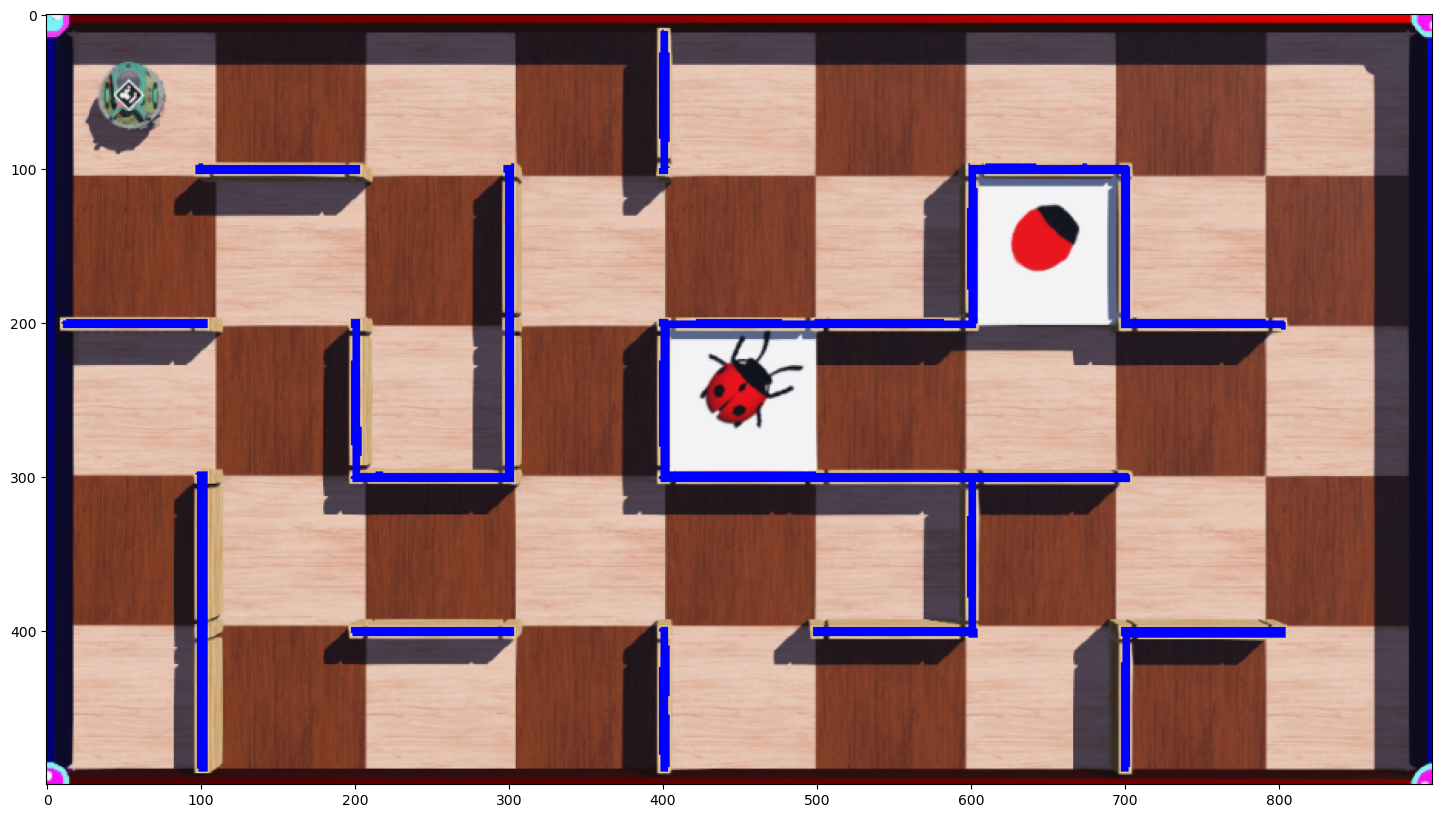

In [13]:
wallImg = np.copy(transformedImg)
wallImg[(ero2Wall==255).all(-1)] = [0,0,255]

plt.figure(figsize = (18,10))
plt.imshow(wallImg)
plt.show()

# Robot detection
## Robot position
#### thresholding for robot position
hmin = 30
smin = 0
vmin = 75
hmax = 110
smin = 125
vmax = 180

In [14]:
# Robot Thresholding

# Set minimum and maximum HSV values to display
lowerRobot = np.array([30, 0, 75])
upperRobot = np.array([110, 125, 180])

# Convert from RGB to HSV format and color threshold
hsv = cv2.cvtColor(wallImg, cv2.COLOR_RGB2HSV)
mask = cv2.inRange(hsv, lowerRobot, upperRobot)
result = cv2.bitwise_and(wallImg, wallImg, mask=mask)
    
# Convert grayscale image to color image for displaying simultaneous
maskRobot = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)

#plt.figure(figsize = (18,10))
#plt.imshow(maskRobot)
#plt.show()

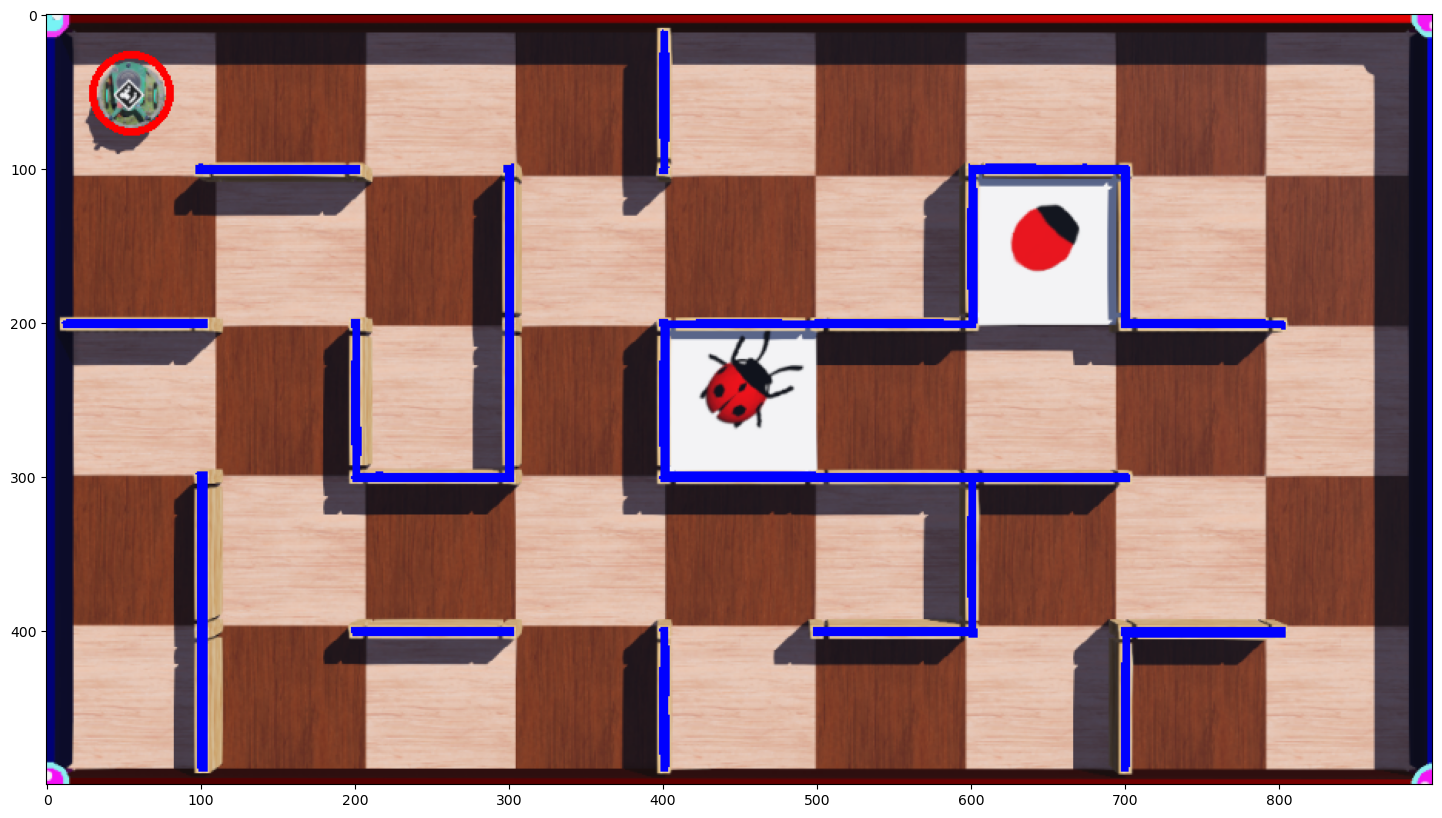

In [15]:
kernel_circle = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))

#eroWall = cv2.erode(maskRobot, kernel2, iterations = 2)
#dilWall = cv2.dilate(maskWall, kernel2, iterations = 3)
#ero2Wall = cv2.erode(dilWall, kernel2, iterations = 4)
openRobot = cv2.morphologyEx(maskRobot, cv2.MORPH_OPEN, kernel2)
dilRobot = cv2.dilate(openRobot, kernel_circle, iterations = 3)
eroRobot = cv2.erode(dilRobot, kernel_circle, iterations = 2)
#closeRobot = cv2.morphologyEx(openRobot, cv2.MORPH_CLOSE, kernel2)

edgesRobot = cv2.Canny(dilRobot, threshold1 = 50, threshold2 = 100, apertureSize = 3)

img2, contoursRobot, hierarchy = cv2.findContours(edgesRobot, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#cv2.drawContours(wallImg, contoursRobot, -1, (255, 0, 0), 3)

robot = contoursRobot[0]
(x,y),radius = cv2.minEnclosingCircle(robot)
robotPos = (int(x),int(y))
#radius = int(radius)
radius = 25
cv2.circle(wallImg,robotPos,radius,(255,0,0),3)

#fig, (ax1, ax2) = plt.subplots(figsize = (18, 10), ncols = 2)
#ax1.imshow(dilRobot, cmap='gray'), ax1.set_title("Original")
#ax2.imshow(edgesRobot, cmap='gray'), ax2.set_title("Morphed")
#plt.show()


plt.figure(figsize = (18, 10))
plt.imshow(wallImg)
plt.show()

## Robot heading

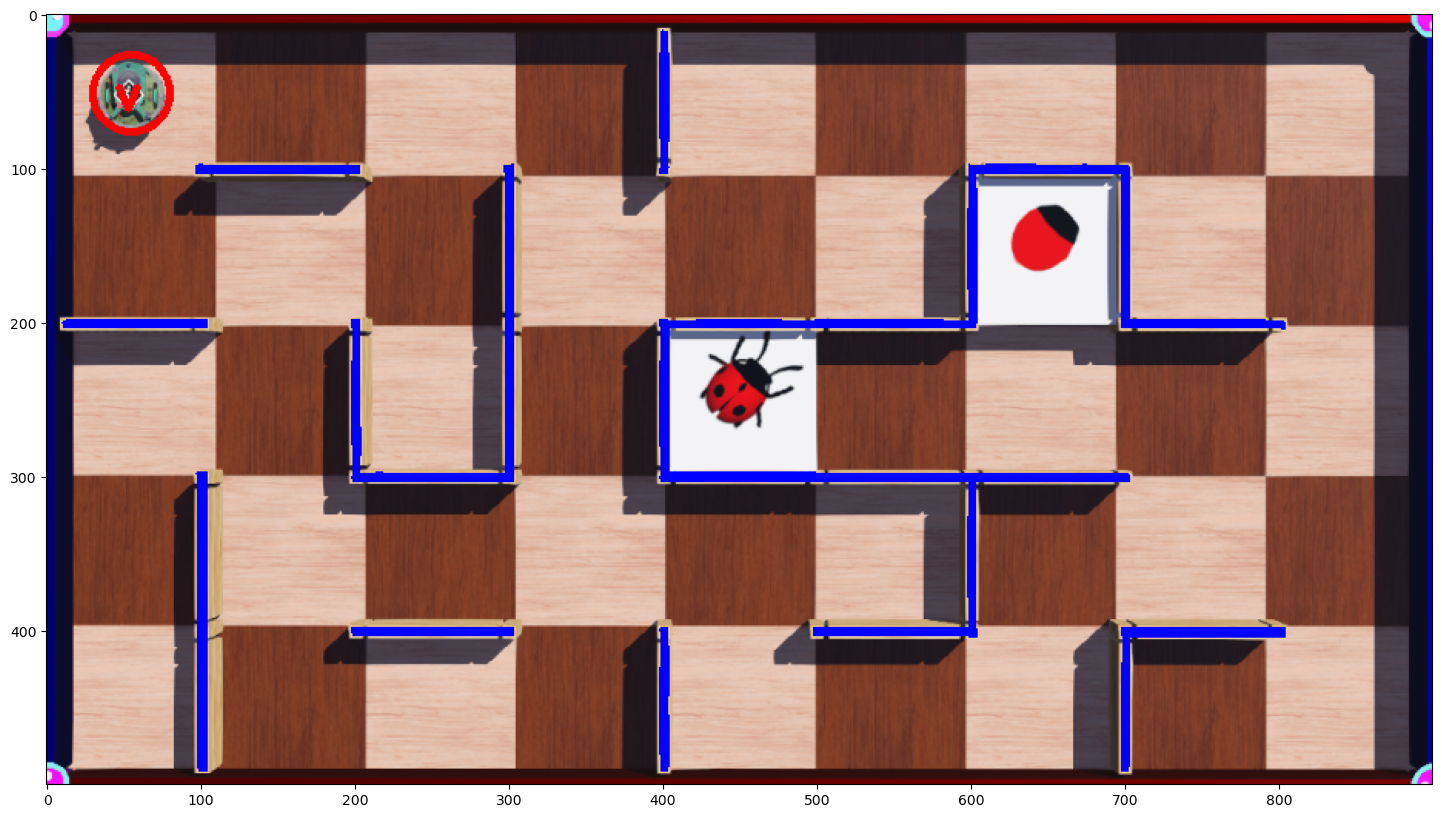

In [16]:
img_robot = cv2.imread(ROBOT_FILE_NAME)
img_robot_rgb = cv2.cvtColor(img_robot, cv2.COLOR_BGR2RGB)

img_robot_rgb_corrected = cv2.warpPerspective(img_robot_rgb, H, (1000,1000))

arucoImg = np.copy(img_robot_rgb_corrected)
dictionary = cv2.aruco.Dictionary_get(cv2.aruco.DICT_6X6_50)

# Initialize the detector parameters using default values
parameters =  cv2.aruco.DetectorParameters_create()
#parameters.minMarkerPerimeterRate = 0.03
#parameters.maxMarkerPerimeterRate = 0.15
#parameters.polygonalApproxAccuracyRate = 0.07

# Detect the markers in the image
markerCorners, markerIds, rejectedCandidates = cv2.aruco.detectMarkers(img_robot_rgb_corrected, dictionary, parameters=parameters)

test = cv2.aruco.drawDetectedMarkers(arucoImg, markerCorners, markerIds)
#test = cv2.aruco.drawDetectedMarkers(arucoImg, rejectedCandidates)
#plot the image
#fig, (ax1, ax2) = plt.subplots(figsize = (18, 10), ncols = 2)
#ax1.imshow(img_robot_rgb_corrected)
#ax2.imshow(test)
#plt.show()

#print(markerCorners[0][0])
markerCentre = np.mean(markerCorners[0][0], axis = 0)
#print(markerCentre)
forwardCorner = markerCorners[0][0][0]

bottomLeftCornerOfText = (robotPos[0] - 10, robotPos[1] + 10)
if forwardCorner[0] < (markerCentre[0]-20):
    robotHead = 'W'
    cv2.putText(wallImg, '<', bottomLeftCornerOfText, cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,0), 3)
elif forwardCorner[0] > (markerCentre[0]+20):
    robotHead = 'E'
    cv2.putText(wallImg, '>', bottomLeftCornerOfText, cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,0), 3)
elif forwardCorner[1] < (markerCentre[1]-20):
    robotHead = 'N'
    cv2.putText(wallImg, '^', bottomLeftCornerOfText, cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,0), 3)
else:
    robotHead = 'S'
    cv2.putText(wallImg, 'v', bottomLeftCornerOfText, cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,0), 3)

#print(robotHead)

plt.figure(figsize = (18, 10))
plt.imshow(wallImg)
plt.show()

# True Target Detection
### Using SURF

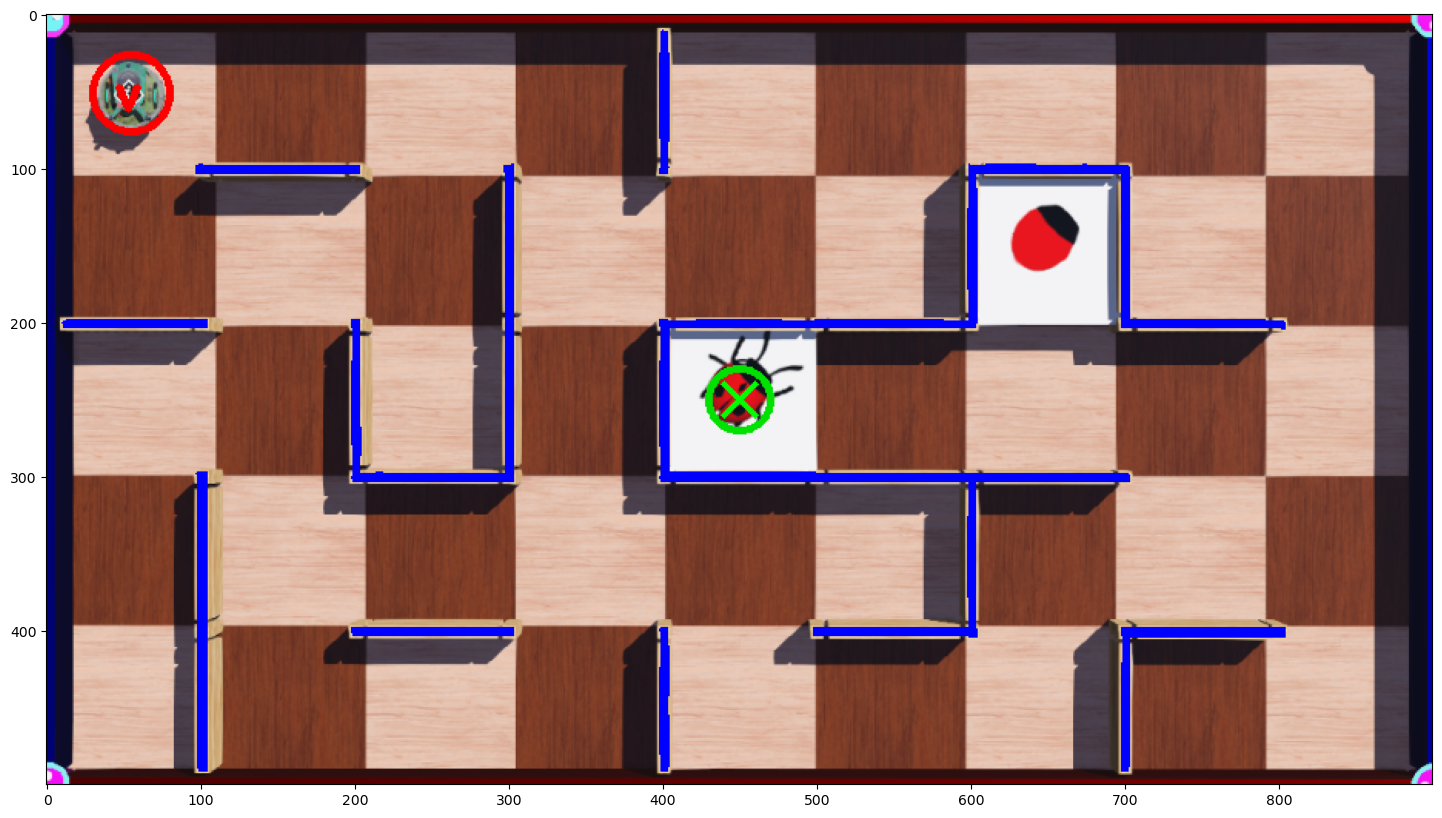

In [17]:
targetTemplate = cv2.imread(IMAGE_LADYBUG_FILE_NAME)
targetTemplateRGB = cv2.cvtColor(targetTemplate, cv2.COLOR_BGR2RGB)

surf  = cv2.xfeatures2d.SURF_create()

kp1, des1 = surf.detectAndCompute(targetTemplateRGB, None)
kp2, des2 = surf.detectAndCompute(wallImg, None)

bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches = bf.match(des1,des2)
matches = sorted(matches, key = lambda x:x.distance)

#img3 = cv2.drawMatches(targetTemplateRGB, kp1, wallImg, kp2, matches[:10], None, flags=2)

#plt.figure(figsize = (18, 10))
#plt.imshow(img3)
#plt.show()

k1Coords = []
k2Coords = []
for m in matches:
    (x1,y1) = kp1[m.queryIdx].pt
    (x2,y2) = kp2[m.trainIdx].pt
    k1Coords.append((x1,y1))
    k2Coords.append((x2,y2))

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
flags = cv2.KMEANS_PP_CENTERS
compactness, labels, centers = cv2.kmeans(np.float32(k2Coords), 5, None, criteria, 1, flags)

labels = np.reshape(labels,labels.size)
coords = np.bincount(labels).argmax()
target = [(int(centers[coords,0])//100)*100+50,(int(centers[coords,1])//100)*100+50]
cv2.circle(wallImg,(target[0],target[1]),20,(0,225,0),3)
cv2.drawMarker(wallImg, (target[0],target[1]), (0,255,0), cv2.MARKER_TILTED_CROSS, 20, 3, 8)

plt.figure(figsize = (18, 10))
plt.imshow(wallImg)
plt.show()

# Generate Map and Write to File

In [18]:
# Convert from image coordinates to rows and columns
# Robot
robotGridRow = robotPos[1]//100
robotGridCol = robotPos[0]//100
#print(robotGridRow)
#print(robotGridCol)

# Target
targetGridRow = target[1]//100
targetGridCol = target[0]//100
#print(targetGridRow)
#print(targetGridCol)

# Internal wall mask preparation
intWalls = cv2.cvtColor(dilWall, cv2.COLOR_BGR2GRAY)

In [19]:
mapTxt = open(MAP_FILE_NAME, 'w')

mapTxt.write(" --- --- --- --- --- --- --- --- --- \n")

for row in range(9):
    for column in range(19):
        if row % 2 == 0:
            # vertical walls
            if column == 0 or column == 18:
                mapTxt.write("|")
            elif column % 2 == 0:
                # possible wall space
                rowSample = row * 50 + 50
                colSample = column * 50
                if intWalls[rowSample, colSample] > 200:
                    mapTxt.write("|")
                else:
                    mapTxt.write(" ")
            else:
                # possible target or starting position
                if row == robotGridRow * 2 and column == robotGridCol*2 + 1:
                    if robotHead == 'N':
                        mapTxt.write(" ^ ")
                    elif robotHead == 'E':
                        mapTxt.write(" > ")
                    elif robotHead == 'S':
                        mapTxt.write(" v ")
                    else:
                        mapTxt.write(" < ")
                elif row == targetGridRow * 2 and column == targetGridCol*2 + 1:
                    mapTxt.write(" x ")
                else:
                    mapTxt.write("   ")
        else:
            # horizontal walls
            if column == 0 or column == 18:
                mapTxt.write(" ")
            elif column % 2 == 0:
                mapTxt.write(" ")
            else:
                # possible wall space
                rowSample = (row+1) * 50
                colSample = (column-1) * 50 + 50
                if intWalls[rowSample, colSample] > 200:
                    mapTxt.write("---")
                else:
                    mapTxt.write("   ")
    mapTxt.write("\n")

mapTxt.write(" --- --- --- --- --- --- --- --- --- \n")

mapTxt.close()